In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [376]:
df = pd.read_excel('G:\Случ_числа.xlsx', index_col = 'Date')

In [377]:
df

,А1,А2,А3,А4
Date,,,,
2020-01-01,43,39,81,52
2020-01-02,80,4,31,71
2020-01-03,23,44,46,82
2020-01-04,20,12,88,27
2020-01-05,28,8,23,73
...,...,...,...,...
2020-12-26,89,41,34,63
2020-12-27,31,57,6,87
2020-12-28,92,16,75,63


### Принято обозначение: 

### А - разница между положительными и отрицательными отзывами за период (день). 

### А1...А4 - количество фронтиров

In [378]:
# количество наблюдений (дней)
day=365

In [379]:
# Количество фронтиров
fr = 4

In [380]:
# количество формируемых портфелей
num_portfolios = 1000

In [381]:
# безрисковая ставка
risk_free_rate = 0.03

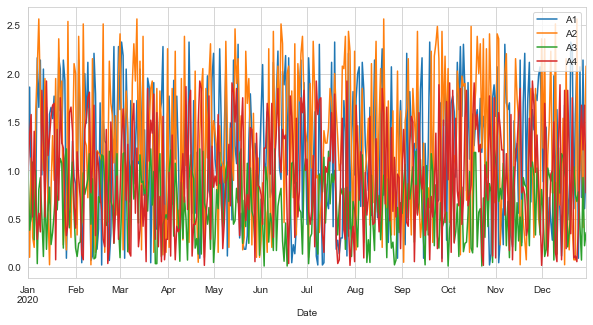

In [382]:
(df / df.iloc[0] ).plot(figsize=(10, 5))

In [383]:
sr_returns = df / df.shift(1)
sr_returns.mean()

А1    2.392598
А2    2.822561
А3    2.526938
А4    2.646603
dtype: float64

In [384]:
# Means
log_returns = np.log(df / df.shift(1))
mean_returns = log_returns.mean()*day


In [385]:
# Risks
log_returns.std()*day**0.5

А1    23.872784
А2    26.038147
А3    24.182590
А4    25.713419
dtype: float64

In [386]:
# Корреляция
log_returns.corr()

,А1,А2,А3,А4
А1,1.000000,-0.067983,-0.104002,0.106137
А2,-0.067983,1.000000,0.079000,-0.128995
А3,-0.104002,0.079000,1.000000,0.075817
А4,0.106137,-0.128995,0.075817,1.000000


In [387]:
# Ковариация
cov_matrix = log_returns.cov()

In [388]:
# Задаем начальные веса случайным образом
weights = np.random.random(fr)
weights = weights/np.sum(weights)
weights

array([0.30556864, 0.25860612, 0.35208929, 0.08373595])

In [389]:
returns = []
volatilities = []

for x in range (1000):
    weights = np.random.random(fr)
    weights /= np.sum(weights)
    returns.append(np.sum(weights * log_returns.mean()) * day)
    volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * day, weights))))
    
returns = np.array(returns)
volatilities = np.array(volatilities)

returns, volatilities

(array([-3.33918836e-01,  2.47655395e-01, -3.69248927e-03, -3.40693917e-01,
         3.04351740e-01, -1.86193640e-01, -1.07101463e-01, -1.39884449e-01,
         2.53872335e-01, -1.83133898e-01, -4.01327929e-01, -8.92664393e-02,
        -2.06010748e-01, -1.01811007e-01, -4.33313820e-01, -4.16217233e-01,
         1.80017143e-02,  2.17031377e-01, -1.35157441e-01,  2.03657709e-02,
        -7.09371665e-02, -3.44518214e-01, -1.38368656e-02, -1.44492336e-01,
        -3.24455477e-01, -3.25603244e-01, -6.84062278e-01, -3.13045059e-01,
        -2.21225683e-01, -3.01690349e-01, -2.50022108e-01, -2.25893822e-01,
        -2.18050850e-01, -1.28896374e-02,  8.32712414e-02, -8.64259369e-02,
        -4.82542069e-01, -4.65563905e-01, -8.77660967e-02, -1.96511823e-01,
        -4.53022720e-01, -2.26913246e-02, -1.10435261e-01, -2.84013781e-01,
        -1.44078493e-01, -1.10443036e-01, -2.08630357e-01, -1.14469618e-01,
        -3.75735389e-02, -1.59085631e-01, -9.55372768e-02, -1.12658713e-01,
        -1.2

In [390]:
portfolios = pd.DataFrame({'Доходность': pfolio_returns, 'Риск': volatilities})
portfolios.head()

,Доходность,Риск
0,0.023418,13.014828
1,-0.312662,14.682953
2,-0.169511,14.213324
3,-0.258181,14.679033
4,-0.198820,15.697292


Text(0, 0.5, 'Ожидаемая доходность')

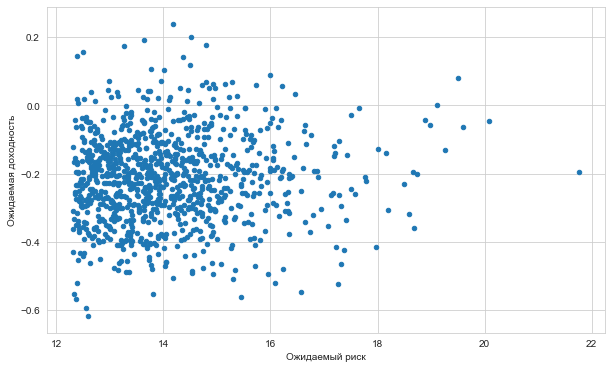

In [391]:
portfolios.plot(x='Риск', y='Доходность',kind = 'scatter',figsize=(10,6));
plt.xlabel('Ожидаемый риск')
plt.ylabel('Ожидаемая доходность')

In [392]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *day
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(day)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(4)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [393]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['Распределение '])
    max_sharpe_allocation['Распределение '] = [round(i*100,2)for i in max_sharpe_allocation['Распределение ']]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df.columns,columns=['Распределение '])
    min_vol_allocation['Распределение '] = [round(i*100,2)for i in min_vol_allocation['Распределение ']] 
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Максимальное распределение портфеля по Коэффициенту Шарпа\n")
    print ("Годовая Доходность:", round(rp,2))
    print ("Годовая Волатильность:", round(sdp,2))
    print ("\n")
    print(max_sharpe_allocation)
    print ("-"*80)
    print ("Минимальное распределение портфеля по Коэффициенту Шарп\n")
    print ("Годовая Доходность:", round(rp_min,2))
    print ("Годовая Волатильность:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Максимальный коэффициент Шарпа')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Минимальная волатильность')
    plt.title('Имитационная Оптимизация портфеля на основе эффективной границы')
    plt.xlabel('Годовая Волатильность')
    plt.ylabel('Годовая Доходность')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Максимальное распределение портфеля по Коэффициенту Шарпа

Годовая Доходность: 204.46
Годовая Волатильность: 21.8


                  А1     А2   А3    А4
Распределение   3.42  84.21  3.3  9.06
--------------------------------------------------------------------------------
Минимальное распределение портфеля по Коэффициенту Шарп

Годовая Доходность: -43.06
Годовая Волатильность: 12.31


                   А1     А2     А3     А4
Распределение   27.91  26.18  25.49  20.42


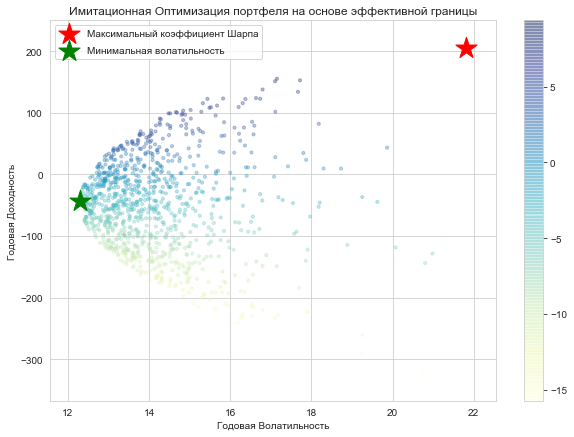

In [394]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)